# Python Unknown: Beginner Grounds
I'm new to Kaggle (in more ways than one!) and am going to try writing some kernels to learn.

**I'm new to Python but not new to programming**. I've written a good amount of bad JavaScript in my life. I'll know some programming fundamentals but I have nearly zero Python knowledge coming into this.

A lot of the content is  super based on this: **[A Home for Pandas and Sklearn: Beginner How-Tos](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)**

I also used other tutorials while making this:

- [Choose a player and create scatter plot for shots](https://www.kaggle.com/sarcasticbhokal/choose-a-player-and-create-scatter-plot-for-shots)

Here's what I'm hoping to do:

1. **Work through the above how-to but with different data**: I'm getting familiar with the Kaggle tools. At this point, I don't know what I don't know.
2. **Figure out something I want to show with that data**: Hopefully something interesting. I've played 5-10 rounds total of PUBG in my life. I won't reveal anything groundbreaking here. I've heard it called the best jogging simulator the world has seen. Maybe I can do something about that. Here's how far different people have walked.
<li><strike><strong>Create some interactive output with D3</strong>: I have some experience with D3 and JavaScript. (Certainly more than I have with Python.) I've seen a few kernels with D3 output so I want to learn about what that process is like.</strike> <em>This turned out to be more involved than I expected. I'll try this in another kernel.</em></li>

As mentioned, I'll be following [A Home for Pandas and Sklearn: Beginner How-Tos](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos) but I'm swapping out the [housing prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) dataset for this dataset: [PLAYERUNKNOWN'S BATTLEGROUNDS Player Statistics](https://www.kaggle.com/lazyjustin/pubgplayerstats)

I don't know what I'm doing! Hopefully I can change that by the end of writing this.

# Let's get started
[A Home for Pandas and Sklearn: Beginner How-Tos](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos) has the following steps:

<ol>
<li>Load your Libraries</li>
<li>Navigating with Pandas</li>
<li>Cleaning your data</li>
<li>Feature Engineering</li>
<li style="color: #ddd">Model Prep: train, test and split</li>
<li style="color: #ddd">Modeling: Linear Regression, Logistic Regression, Random Forests</li>
<li style="color: #ddd">Quest for the best parameters</li>
<li style="color: #ddd">Scores, Loss, and whats under the hood</li>
</ol>

I worked roughly through the first 4 steps and then sort of trailed off into different areas.

Oh yeah so let's actually get started.

### 1. Load your libraries, load your data
This is pretty much just a straight copy/paste. A lot of the imported libraries are used for steps I didn't get around to.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
import matplotlib.pyplot as plt
# Using stuff from https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


%matplotlib inline



C:\Users\Ramesh Pradhan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The next code block loads the data. The commented lines show some things I tried while following the tutorial. The last line shows how you can filter the data on one column.

Here's roughly what `cs_data[cs_data['solo_Wins']>75].head(10)` says:
- <div style="display: inline; padding: 4px; background: yellow; font-weight: bold">cs_data</div>[cs_data['solo_Wins']>75].head(10) We're working with `cs_data` which is the variable we created when we import the data
- cs_data[<div style="display: inline; padding: 4px; background: yellow; font-weight: bold">cs_data['solo_Wins']>75</div>].head(10) — In this data set, search column `solo_Wins` for values above 75
- cs_data[cs_data['solo_Wins']>75].<div style="display: inline; padding: 4px; background: yellow; font-weight: bold">head(10)</div> — Simplest first, this means show up to 10 values


In [3]:
cs_data = pd.read_csv('PUBG_Player_Statistics.csv')
cs_data.info()

# cs_data.shape
# cs_data.describe()
# cs_data.head(2) # What does this '2' do? Nevermind I see now.
# cs_data[['solo_RoundsPlayed']].head(150)
# cs_data.as_matrix()
# pd.DataFrame(cs_data.as_matrix()).head()
# cs_data[['solo_Wins', 'solo_RoundsPlayed', 'solo_Top10s']].head(5)
# cs_data.iloc[range(3),] # Why is there a comma and no argument?
# print('this many columns:%d ' % len(cs_data.columns))
# cs_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87898 entries, 0 to 87897
Columns: 152 entries, player_name to squad_DBNOs
dtypes: float64(83), int64(68), object(1)
memory usage: 101.9+ MB


### 2. Navigating with Pandas
Let's show something.

Here's a breakdown of the next line: `cs_data[cs_data['solo_Wins']>75].head(10)`

- <div style="display: inline; padding: 4px; background: yellow; font-weight: bold">cs_data</div>[cs_data['solo_Wins']>75].head(10) We're working with `cs_data` which is the variable we created when we import the data
- cs_data[<div style="display: inline; padding: 4px; background: yellow; font-weight: bold">cs_data['solo_Wins']>75</div>].head(10) — In this data set, search column `solo_Wins` for values above 75
- cs_data[cs_data['solo_Wins']>75].<div style="display: inline; padding: 4px; background: yellow; font-weight: bold">head(10)</div> — Show up to 10 rows

In [4]:
cs_data[cs_data['solo_Wins']>75].head(10)

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
162,MenpaYoutube,6110,3.32,24.11,686966.07,423,102,0.46,286,67.6,...,140102.50,230058.59,1243.79,2381.08,333.94,162,11,156,25045.86,173
430,Akaskillz,12493,3.82,14.49,778074.01,566,82,0.66,250,44.2,...,321945.30,719276.10,1775.87,1352.55,343.71,679,63,496,73636.73,494
592,DragoGo,17854,2.74,11.79,1147982.00,840,99,0.26,386,46.0,...,79299.95,129421.60,1392.27,2202.78,331.79,104,7,72,12116.65,90
662,Tw1tch_ArmutTV,6274,3.38,15.92,850730.27,666,106,0.56,285,42.8,...,838114.40,1412763.20,1912.32,2758.19,638.52,1471,90,710,118661.40,811
7676,PeakingKoala,18497,6.14,23.08,514027.76,416,96,0.54,165,39.7,...,207584.68,296342.42,1319.00,3396.70,424.01,111,21,112,32958.06,229
15930,MrGrimmmz,924,4.91,8.38,839560.67,1229,103,0.53,185,15.1,...,130345.96,317015.17,1584.51,1881.65,472.00,280,33,216,58121.74,423


Here's a simpler query. Just show the first 5 rows in all of the data.

In [5]:
cs_data.head(5) # Okay let's show like 5 things

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


<div style="background: #eee; padding: 20px; margin-bottom: 20px"><p>**Note** : Here's something I learned *after* I wrote this entire thing. When you're writing a kernel, the data you're using is in the right panel. Well okay I knew that part.</p><p>Here's what I didn't know: <ul><li>You can click an individual dataset in the left menu</li><li>One tab (**Column Metadata**) shows you all the columns in the dataset: You learn this once and never forget it but, again, I didn't learn until after and I kept printing out all the columns for reference while working on this.</li><li>Another tab (**Column Metrics**) gives you some charts to start with.</li></ul></p></div>
</div>
When you get data, you want to get a high level view of that data. Pandas has a couple neat functions to get this kind of view.

First, there's `shape`.

In [6]:
cs_data.shape

(87898, 152)

That means there's 87,898 rows and 152 columns.

You can also do `describe`

In [7]:
cs_data.describe()

,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
count,87898.000000,87898.000000,87898.000000,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,...,8.789800e+04,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000
mean,110794.357050,1.865855,5.017506,6.971571e+04,79.275342,2.080093,0.179251,12.106282,20.667335,77.195249,...,3.163813e+05,5.968687e+05,1630.826705,1772.866887,381.417868,345.853148,39.403160,226.072345,30960.026736,201.564017
std,63648.581759,1.776301,10.077138,8.040861e+04,96.947859,3.394513,0.217444,14.694722,16.181078,95.545156,...,2.895132e+05,4.910160e+05,433.957257,803.932786,182.995324,300.328618,33.500954,204.961191,27498.941894,181.558141
min,0.000000,0.000000,0.000000,7.610000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51925.250000,1.030000,0.000000,1.789705e+04,17.000000,0.000000,0.000000,4.000000,10.800000,16.000000,...,1.266086e+05,2.661650e+05,1377.460000,1226.412500,282.830000,144.000000,17.000000,91.000000,12827.937500,82.000000
50%,112705.500000,1.470000,2.000000,4.517333e+04,48.000000,1.000000,0.110000,8.000000,16.700000,46.000000,...,2.380680e+05,4.743565e+05,1592.410000,1645.455000,354.405000,266.000000,31.000000,169.000000,23608.320000,153.000000
75%,164879.750000,2.140000,5.560000,9.246264e+04,105.000000,3.000000,0.250000,15.000000,25.900000,102.000000,...,4.116721e+05,7.820437e+05,1847.200000,2177.837500,443.567500,456.000000,52.000000,295.000000,40426.240000,263.000000
max,222490.000000,100.000000,100.000000,1.521200e+06,1681.000000,106.000000,1.000000,386.000000,100.000000,1673.000000,...,4.323045e+06,6.057798e+06,47314.750000,9632.720000,4604.990000,4394.000000,417.000000,2769.000000,484492.810000,3334.000000


The `describe` table gives you some distribution info. It's a good start to understanding the data you have at your fintertips.

### 3. Clean your data
Do the real winners here save their friends? Are the best killers also the healers? Maybe that's something I can find out. 

How do you gather these insights?

Okay first let me talk about something. If you finish something like a notebook or whatever it might be, you might want to kick back and relax a little. You might even have a beer.

A lot of people get very into beer and then get into brewing their own and then there are people that get very very into beer and start thinking about how to start their own brewery. I remember reading about this once a few years ago on some food blog. 

**Update**: I found the post! From [Serious Eats](http://drinks.seriouseats.com/2014/03/challenges-of-opening-a-brewery-job-advice-beer-industry-collin-mcdonnell-henhouse.html):

> If you're considering this line of work, you better be the kind of person who finds doing the dishes relaxing. Cleaning floors, cleaning tanks, cleaning hoses, cleaning kegs, cleaning glasses, cleaning drains, cleaning parts: every day in a brewery starts with cleaning and ends with cleaning. 

One of the first things I'm learning is that you cleaning data is one of the things you'll just always be doing in data science. You probably already knew that. If that's the case, you're likely one of the many many many people ahead of me in this journey.

So the first step to gathering these insights is to clean your data. 

In [8]:
# This is an example to find null values in a column.
cs_data[cs_data['solo_Wins'].isnull()].head(10)
# No results below becasue all the rows have entries for this column

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs


Okay after that entire story about clean data I think this is actually already pretty clean stuff.

There's a section in the tutorial about categorical vs. continuous data. I think this is prety much all numerical data. "Kill" is a pretty brutal unit.

In the future it'd be great to categorize these things as like:
- Distance
- Lives (Kills/Deaths)
- Heals
- Damage

Things like that. I think I'll end up in a rabbit hole. I'll keep pushing on through the tutorial.

## 4. Feature engineering (in which I answer a question nobody is asking)

Okay there's a section in the tutorial called "feature engineering" and it's a term I've come across a few times. From [Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering):

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. The need for manual feature engineering can be obviated by automated feature learning.

I'll have a better idea of what that means someday.

Anyway, I should start writing questions down here. I think I can do that with some HTML and mark the questions in some color.

So here's the question nobody is asking:

### <div style="border: 3px dashed lime; padding: 20px; margin-bottom: 20px;">Q: How far has everyone walked total in solo mode?</div>

Now here are the steps I'll try to take to answer this question:

- **Take the solo move distance (take a column)**: We'll use `solo_WalkDistance` for some of this data
- **Find the total (apply a function)**: Okay so it's not the craziest thing but I need to learn some Python fundamentals

(I'm skipping the "transform" part for now.)


In [9]:
sum = 0

for x in cs_data['solo_WalkDistance']:
    sum = sum + x

print(sum)

# Okay I'm sure there's probably some function that handles this in one line

9099278326.729994


There we go: 85,000 players have walked 9,099,278,326... let me see what this unit is. Okay it looks like meters.

Let's change this to miles.

In [10]:
print(sum / 1609)

5655238.239111246


Okay so they've walked 5,665,238 miles. How many [times around earth](https://www.google.com/search?q=how+many+miles+around+earth) is this?

In [11]:
print(sum / 1609 / 24901)

227.10888073214915


### <div style="background: lime; padding: 20px; margin-bottom: 20px;"><span style="font-weight: normal">Q: How far has everyone walked total in solo mode?</span>  <strong>In total, they've walked around the earth 227 times!</strong></div>

# The 26 people you'll meet in heaven

### <div style="border: 3px dashed lime; padding: 20px; margin-bottom: 20px;">Is there anyone who has saved more people than they've killed?</div>

Let's see if this is a useful stat. I think I need to create a column based on two other columns. Then I can make a chart. I've sketched this out on paper.

First it'll be a scatter plot of saves against kills.

Wait I need to get all columns with kill related data.

In [12]:
kill_cols = [col for col in cs_data.columns if ('Kill' in col)]
# TIL: col, x, and y have special meanings
print(kill_cols)

['solo_KillDeathRatio', 'solo_HeadshotKillsPg', 'solo_KillsPg', 'solo_RoadKillsPg', 'solo_TeamKillsPg', 'solo_Kills', 'solo_TeamKills', 'solo_HeadshotKills', 'solo_HeadshotKillRatio', 'solo_RoadKills', 'solo_DailyKills', 'solo_WeeklyKills', 'solo_RoundMostKills', 'solo_MaxKillStreaks', 'solo_LongestKill', 'duo_KillDeathRatio', 'duo_HeadshotKillsPg', 'duo_KillsPg', 'duo_RoadKillsPg', 'duo_TeamKillsPg', 'duo_Kills', 'duo_TeamKills', 'duo_HeadshotKills', 'duo_HeadshotKillRatio', 'duo_RoadKills', 'duo_DailyKills', 'duo_WeeklyKills', 'duo_RoundMostKills', 'duo_MaxKillStreaks', 'duo_LongestKill', 'squad_KillDeathRatio', 'squad_HeadshotKillsPg', 'squad_KillsPg', 'squad_RoadKillsPg', 'squad_TeamKillsPg', 'squad_Kills', 'squad_TeamKills', 'squad_HeadshotKills', 'squad_HeadshotKillRatio', 'squad_RoadKills', 'squad_DailyKills', 'squad_WeeklyKills', 'squad_RoundMostKills', 'squad_MaxKillStreaks', 'squad_LongestKill']


Okay I think we want a new column that sums `solo_Kills`, `duo_Kills`, and `squad_Kills`.

In [13]:
save_cols = [col for col in cs_data.columns if ('Heal' in col)]
print(save_cols)

['solo_HealsPg', 'solo_Heals', 'duo_HealsPg', 'duo_Heals', 'squad_HealsPg', 'squad_Heals']


And another column that sums `solo_Heals`, `duo_Heals`, and `squad_Heals`.

Let's see if this works...

In [14]:
cs_data['total_Kills'] = cs_data['solo_Kills'] + cs_data['duo_Kills'] + cs_data['squad_Kills']
cs_data[['total_Kills', 'solo_Kills', 'duo_Kills', 'squad_Kills']].head()

,total_Kills,solo_Kills,duo_Kills,squad_Kills
0,1945,44,65,1836
1,2361,119,41,2201
2,2438,18,72,2348
3,1418,56,8,1354
4,1704,42,392,1270


In [15]:
cs_data['total_Heals'] = cs_data['solo_Heals'] + cs_data['duo_Heals'] + cs_data['squad_Heals']
cs_data[['total_Heals', 'solo_Heals', 'duo_Heals', 'squad_Heals']].head()

,total_Heals,solo_Heals,duo_Heals,squad_Heals
0,2254,33,35,2186
1,2128,60,27,2041
2,1799,5,28,1766
3,1223,8,1,1214
4,1456,12,199,1245


Okay that looks like it's working. Now we want to take those two columns and get a heal/death ratio.

In [16]:
cs_data['ratio_HealKill'] = cs_data['total_Heals'] / cs_data['total_Kills']
cs_data[['ratio_HealKill','total_Heals','total_Kills']].head()

,ratio_HealKill,total_Heals,total_Kills
0,1.158869,2254,1945
1,0.901313,2128,2361
2,0.737900,1799,2438
3,0.862482,1223,1418
4,0.854460,1456,1704


**The math looks right but something's bugging me**...

I think "Heals" is something else. It doesn't seem like so many people would be so close to even.

After looking through the PUBG tracker, I'm seeing that there's a "Revive" category. I missed this while browsing the columns in the console. Let's take a look at that.

In [17]:
revive_cols = [col for col in cs_data.columns if ('Revive' in col)]
print(revive_cols)
cs_data['total_Revives'] = cs_data['solo_Revives'] + cs_data['duo_Revives'] + cs_data['squad_Revives']
cs_data[['total_Revives', 'solo_Revives', 'duo_Revives', 'squad_Revives']].head()

['solo_RevivesPg', 'solo_Revives', 'duo_RevivesPg', 'duo_Revives', 'squad_RevivesPg', 'squad_Revives']


,total_Revives,solo_Revives,duo_Revives,squad_Revives
0,236,0,2,234
1,278,0,2,276
2,212,0,2,210
3,143,0,1,142
4,146,0,26,120


In [18]:
cs_data['ratio_ReviveKill'] = cs_data['total_Revives'] / cs_data['total_Kills']
cs_data[['ratio_ReviveKill','total_Revives','total_Kills']].head()

,ratio_ReviveKill,total_Revives,total_Kills
0,0.121337,236,1945
1,0.117747,278,2361
2,0.086957,212,2438
3,0.100846,143,1418
4,0.085681,146,1704


Okay let's scatter this thing. Using [Choose a player and create scatter plot for shots](https://www.kaggle.com/sarcasticbhokal/choose-a-player-and-create-scatter-plot-for-shots) for reference.

Text(0,0.5,'Total Kills')

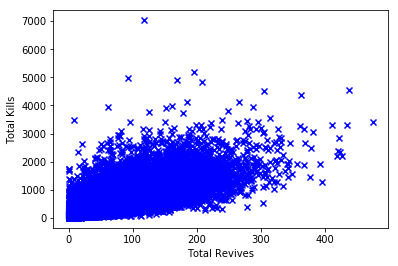

In [19]:
import pylab # Not sure if I can use another library
what=plt.scatter(
    cs_data['total_Revives'],
    cs_data['total_Kills'],
    c='b',
    marker='x') # Color = blue?
plt.xlabel("Total Revives")
plt.ylabel("Total Kills")


In [20]:
cs_data['ratio_ReviveKill'].describe()

count    87898.000000
mean         0.137294
std          0.076770
min          0.000000
25%          0.090407
50%          0.124424
75%          0.168042
max          2.000000
Name: ratio_ReviveKill, dtype: float64

Get ready...

### <div style="background: lime; padding: 20px; margin-bottom: 20px;"><span style="font-weight: normal">**These are the 26 people you'll meet in heaven:**

In [21]:
pubg_angels = cs_data[(cs_data['ratio_ReviveKill']>1)]
pubg_angels[['player_name','ratio_ReviveKill','total_Revives','total_Kills']]

,player_name,ratio_ReviveKill,total_Revives,total_Kills
5396,GGURUMM,1.486842,113,76
17462,Littlehands23,1.550000,31,20
26023,Synnara,1.007407,136,135
33436,Spotlightstar,1.482759,43,29
33438,rakuda28,1.125000,36,32
39815,Madafaka,1.187500,19,16
41430,MonG_Guel,1.418605,61,43
42625,Possm,1.555556,42,27
43555,Yuuki_Kurisu,1.038462,27,26
44653,HoneyBunny_Tv,1.333333,20,15


Text(0,0.5,'Total Kills')

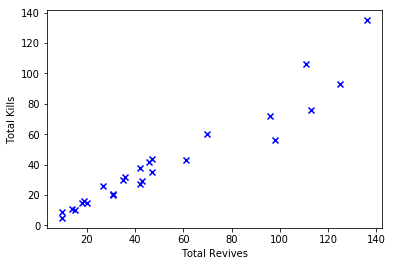

In [22]:
what=plt.scatter(
    pubg_angels['total_Revives'],
    pubg_angels['total_Kills'],
    c='b',
    marker='x') # Color = blue?
plt.xlabel("Total Revives")
plt.ylabel("Total Kills")


That's the end for trying things with  [A Home for Pandas and Sklearn: Beginner How-Tos](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos). Again, we went through these steps:

✓ Load your Libraries

✓ Navigating with Pandas

✓ Cleaning your data

✓ Feature Engineering

And I skipped these:

<div style="color: #ccc"><p style="color: #ccc">(5) Model Prep: train, test and split</p><p style="color: #ccc">(6) Modeling: Linear Regression, Logistic Regression, Random Forestst</p><p style="color: #ccc">(7) Quest for the best parameterst</p><p style="color: #ccc">(8) Scores, Loss, and whats under the hood</p></div>

Not yet done though, I trailed off into some other things.

# Bonus: The some-other-things hodgepodge

### One Seaborn thing
Seaborn is a python library for data visualization. The next code block is based on  [FIFA 18 Data Exporation and D3.js Visualization](https://www.kaggle.com/skalskip/fifa-18-data-exploration-and-d3-js-visualization/notebook)

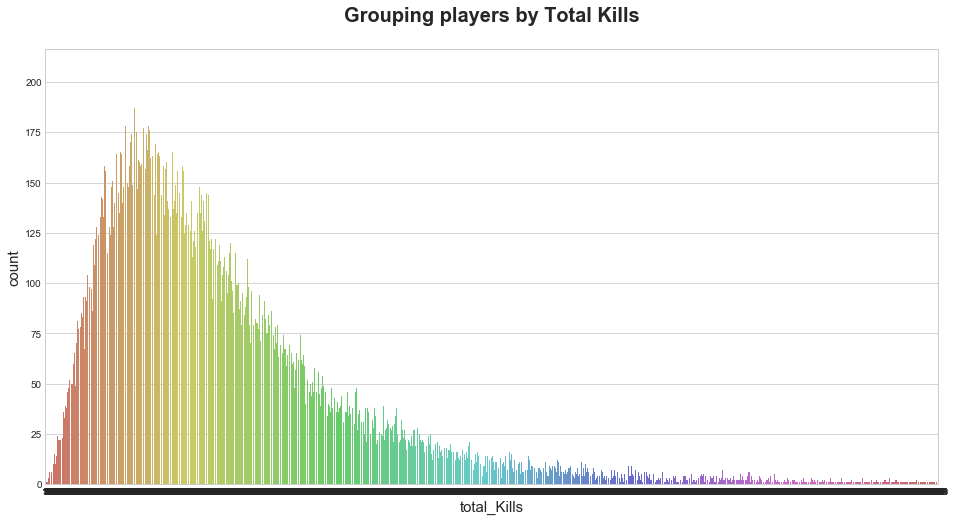

In [23]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Total Kills', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Player Kills', fontsize=15)
sns.countplot(x="total_Kills", data=cs_data, palette="hls");
plt.show()

*I started going down the D3 path around here. As mentioned at the start of this kernel, I didn't get around to finishing this. It seemed like quite a rabbit hole and I hopped out for the moment.*

### Correlations and scatter plots
I really liked seeing the section called "Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)" in this tutorial: **[Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)**.

I'll try it out on the PUBG data.

Maybe I can get something interesting.

* Find things correlated with a lot of kills
* Use Seaborn to make a bunch of charts showing the relationships

Let's say the goal is to have the most kills. Well, you can get that through sheer hours played. 

Maybe something like K/D ratio is better? Kills per minute played? 

Let's look at a correlation matrix for inspiration.

I wrote a comment for each line to explain what (I think) is going on.

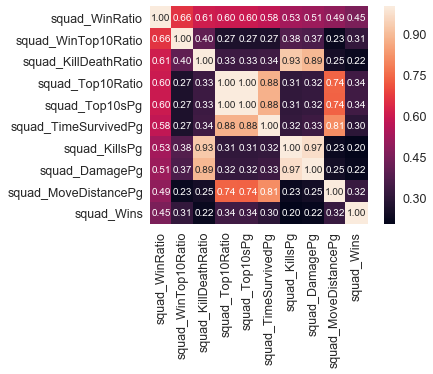

In [24]:
# Let's create a correlation matrix

# Number of variables for heatmap
k = 10

# Get correlations and store it in corrmat
corrmat = cs_data.corr()

# Find the 10 (k from above) columns wtih the highest correlation (I think!)
cols = corrmat.nlargest(k, 'squad_WinRatio')['squad_WinRatio'].index

# Use NumPy (np) to calculate the correlation coefficients for these column values
cm = np.corrcoef(cs_data[cols].values.T)

# Set chart font size in Seaborn (sns) 
sns.set(font_scale=1.25)

# Use Seaborn (sns) to generate a heatmap using the correlations stored in cols
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

# Use matplotlib.pyplot (plt) to show this chart — how does it know what to show...?
plt.show()


Ok no surprises here because a lot of these things just overlap. Most kills will have the highest ratios.

I need to restrict it to things that a player does. (Is this a lead measure/lag measure thing?) Let's take a look.

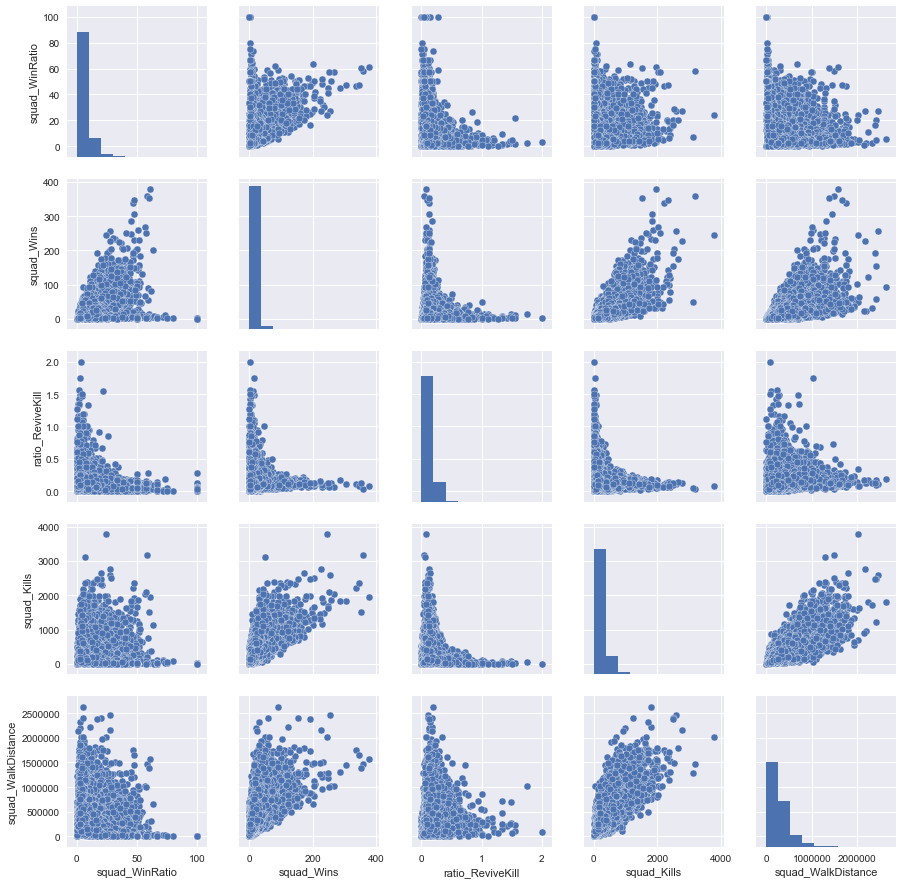

In [25]:
# scatterplot
sns.set()
cols = ['squad_WinRatio', 'squad_Wins', 'ratio_ReviveKill', 'squad_Kills', 'squad_WalkDistance']
sns.pairplot(cs_data[cols], size = 2.5)
plt.show();

Those are pretty fun to look at. Ok now I'll just try some other things.

### Trying to find the best players

I created an `adjusted wins` column which would take wins and your win ratio.

In [26]:
# let's make a column that's wins * win ratio
cs_data['adjusted_wins'] = cs_data['squad_Wins'] * (cs_data['squad_WinRatio']/100)
cs_data[['player_name','adjusted_wins','squad_Wins','squad_WinRatio']].head()

,player_name,adjusted_wins,squad_Wins,squad_WinRatio
0,BreakNeck,144.9055,305,47.51
1,Blackwalk,158.2178,338,46.81
2,mercedes_benz,164.2698,347,47.34
3,DORA,87.2712,207,42.16
4,n2tstar,89.5327,193,46.39


In [27]:
# Find the best winners
winners = cs_data[(cs_data['adjusted_wins']>100)]
cs_data[['player_name','squad_Rating', 'squad_Kills', 'squad_WinRatio']].head()

,player_name,squad_Rating,squad_Kills,squad_WinRatio
0,BreakNeck,3212.25,1836,47.51
1,Blackwalk,3156.94,2201,46.81
2,mercedes_benz,3170.41,2348,47.34
3,DORA,3078.62,1354,42.16
4,n2tstar,3085.86,1270,46.39


Not the most interesting thing, it pretty much matches up to squad rating. (I'm guessing that's documented somewhere.)

### Is walking better than riding?
Walking is good for your health.

But that's real life. 

Let's see if walking and riding vehicles has anything to do with winning.

In [28]:
# Find a walk/vehicle ratio
cs_data['ratio_walk_vehicle'] = cs_data['squad_AvgWalkDistance'] / (cs_data['squad_AvgRideDistance'] + cs_data['squad_AvgWalkDistance'])
cs_data[['player_name','ratio_walk_vehicle','squad_AvgWalkDistance','squad_AvgRideDistance']].head(10)

,player_name,ratio_walk_vehicle,squad_AvgWalkDistance,squad_AvgRideDistance
0,BreakNeck,0.375302,2626.97,4372.64
1,Blackwalk,0.287289,2422.48,6009.73
2,mercedes_benz,0.383289,1871.89,3011.87
3,DORA,0.278626,2154.62,5578.41
4,n2tstar,0.271085,2098.47,5642.54
5,coldoxygen,0.320141,2078.93,4414.86
6,Giken,0.355168,1664.77,3022.51
7,KoreaNo1,0.261164,1635.86,4627.86
8,undor,0.320258,2207.61,4685.61
9,Fordune,0.352758,1981.29,3635.28


Of the top 10 players, the ratios vary from 27%-38% of their distance walked.

In [29]:
cs_data[['player_name','ratio_walk_vehicle','squad_AvgWalkDistance','squad_AvgRideDistance']].tail(10)

,player_name,ratio_walk_vehicle,squad_AvgWalkDistance,squad_AvgRideDistance
87888,apsy,0.401524,1876.83,2797.44
87889,hierzn,0.627043,2086.36,1240.94
87890,tehWarS,0.345907,1254.90,2372.95
87891,IssacC0x,0.499816,1481.90,1482.99
87892,Vid_TouchesButts,0.552770,1524.39,1233.34
87893,SaikoMene,0.553451,1863.11,1503.24
87894,KARUKOR,0.507087,1636.41,1590.67
87895,Dertydann,0.659699,2109.40,1088.12
87896,Neferhor,0.497303,1785.15,1804.51
87897,pepperedangus,0.536902,1638.83,1413.55


This is very unscientific but the bottom 10 players seem to walk a lot more. This is probably some result of dying faster and not even getting to vehicles or not needing to travel far distances.

I'll try plotting the walk distances to adjusted wins.

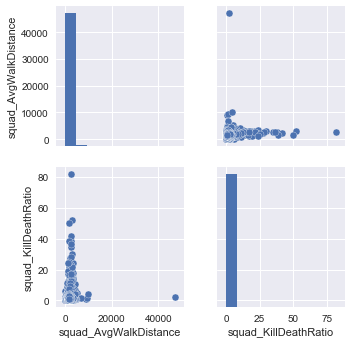

In [30]:
sns.set()
# cols = ['adjusted_wins', 'ratio_walk_vehicle', 'squad_AvgRideDistance', 'squad_MoveDistancePg']
cols = ['squad_AvgWalkDistance', 'squad_KillDeathRatio']
sns.pairplot(cs_data[cols], size = 2.5)
plt.show();

This gives me somethingt do to. **I want to get rid of that far-right dot.** It's an outlier for this so I need to hunt it down.

In [31]:
cs_data[(cs_data['squad_AvgWalkDistance']>40000)]

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_Boosts,squad_DamageDealt,squad_DBNOs,total_Kills,total_Heals,ratio_HealKill,total_Revives,ratio_ReviveKill,adjusted_wins,ratio_walk_vehicle
42146,DrHannibal17,47217,1.45,5.66,83140.58,106,6,0.42,18,17.0,...,743,113064.07,803,1506,1348,0.895086,181,0.120186,1.3832,0.97754


**Tasty!**

Now let's re-plot without that outlier.

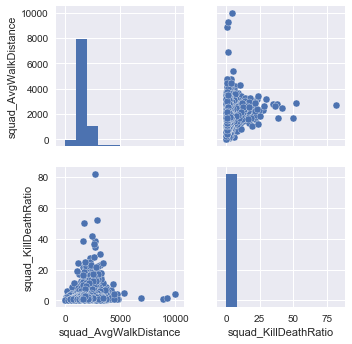

In [32]:
sns.set()
# cols = ['adjusted_wins', 'ratio_walk_vehicle', 'squad_AvgRideDistance', 'squad_MoveDistancePg']
cols = ['squad_AvgWalkDistance', 'squad_KillDeathRatio']
removed = cs_data[(cs_data['squad_AvgWalkDistance']<40000)]
sns.pairplot(removed[cols], size = 2.5)
plt.show();

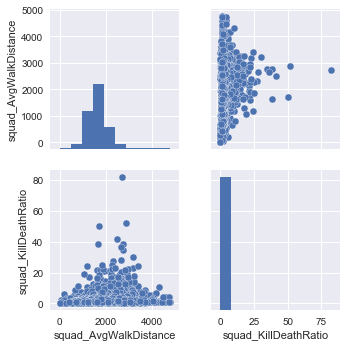

In [33]:
sns.set()
# cols = ['adjusted_wins', 'ratio_walk_vehicle', 'squad_AvgRideDistance', 'squad_MoveDistancePg']
cols = ['squad_AvgWalkDistance', 'squad_KillDeathRatio', ]
removed = cs_data[(cs_data['squad_AvgWalkDistance']<5000)]
# removed = removed[(removed['squad_KillDeathRatio']<10)]
sns.pairplot(removed[cols], size = 2.5)
plt.show();

I don't think I'll come up with anything useful going down this road, so the hodgepodge ends here.

# That's that (For now!)
Toward the end of this I started just toggling the inputs. I haven't advanced my data science skills much, but I did learn to use some of the tools.

Next time, I'll give that D3 chart another shot and try some things out on a different dataset. **Thanks for checking this out!**